In [1]:
from Multigrid_poison import *
from Multigrid_heat import *
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import warnings
warnings.filterwarnings("ignore")

## SIMPLE POISSON TEST

\begin{align}
      &u_{xx} + u_{yy} = -2[(1-6x^2)y^2(1-y^2) + (1 - 6y^2)x^2(1 - x^2)] \\
     &[0, 1] \times  [0, 1] \, \text{with} \, u = 0 \, \text{on the boundary}.
  \end{align}
  
  
  The analytic solution is given by;
\begin{align}
    u(x,y) = (x^2 - x^4)(y^4 - y^2)
\end{align}

In [2]:
analytical = lambda x,y: (x**2 - x**4)*(y**4 - y**2)
rhs = lambda x,y:   -2*((1-6*x**2)*y**2*(1-y**2) + (1-6*y**2)*x**2*(1-x**2))

In [3]:
max_cycles = 10  #number of multigrid cycles
nL    = 8   #number of grid levels
nx         = 1*2**(nL-1)  #Domain setup
ny         = 1*2**(nL-1)
tol        = 1e-10  
u   =np.zeros([nx+2,ny+2]) #intialize solution
f   =np.zeros([nx+2,ny+2]) #initialize right hand side

In [4]:
dx=1.0/nx
dy=1.0/ny

#cell centered node
xc=np.linspace(0.5*dx,1-0.5*dx,nx)
yc=np.linspace(0.5*dy,1-0.5*dy,ny)
XX,YY=np.meshgrid(xc,yc,indexing='ij')

In [5]:
f[1:-1,1:-1] =rhs(XX,YY)
v = analytical(XX,YY)

In [6]:
for it in range(max_cycles):
    vg = Mgrid(nL)
    u,res=vg.vycle(nx,ny,u,f)
    rtol=np.max(np.max(np.abs(res)))
    if(rtol<tol):
        break
    error=v-u[1:-1,1:-1]



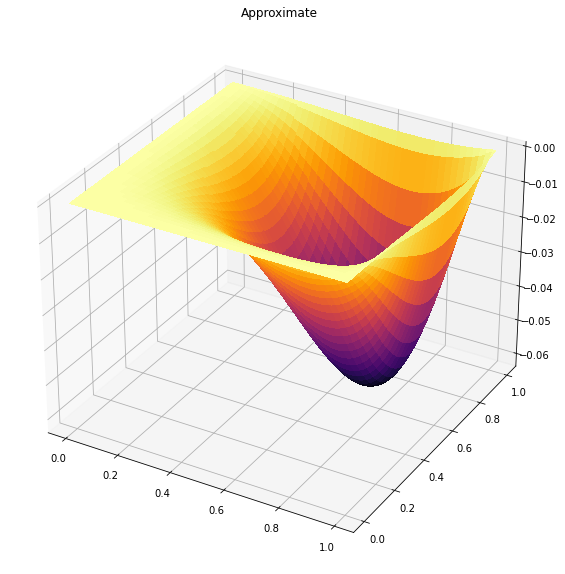

In [7]:
fig = plt.figure(figsize =(15, 10))

ax = fig.gca(projection='3d')
surf = ax.plot_surface(XX, YY, u[1:-1,1:-1],cmap='inferno',
                       linewidth=0, antialiased=False)

ax.set_title("Approximate")
plt.show()


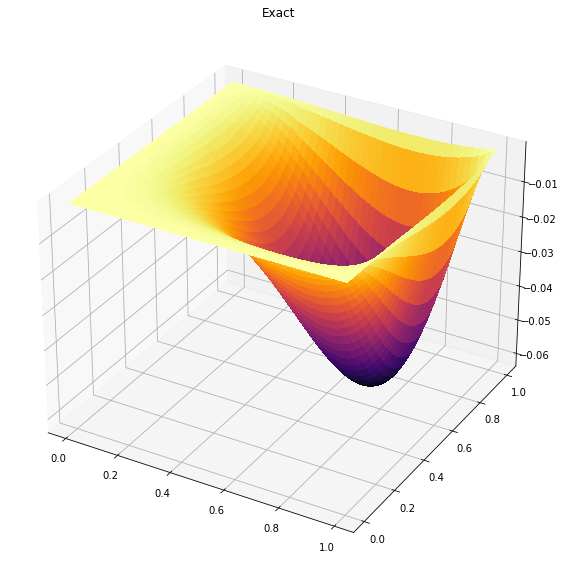

In [8]:
fig = plt.figure(figsize =(15, 10))

ax = fig.gca(projection='3d')
surf = ax.plot_surface(XX, YY, v,cmap='inferno',
                       linewidth=0, antialiased=False)

ax.set_title("Exact")
plt.show()


In [9]:
np.max(np.abs(u[1:-1,1:-1] - v)) # maximum error

1.8820661918174473e-05

## STEADY STATE HEAT EQUATION WITH SOURCE TERM

\begin{align}
 \nabla u = - Q
\end{align}
Where $Q = \sin(10((x-1)^2 + (y-1)^2))$

In [10]:
source = lambda x,y: -1*(np.sin(10*((x-1)**2 + (y-1)**2)))

In [11]:
max_cycles = 10  #number of multigrid cycles
nL    = 8   #number of grid levels
nx         = 1*2**(nL-1)  #Domain setup
ny         = 1*2**(nL-1)
tol        = 1e-10  
u   =np.zeros([nx+2,ny+2]) #intialize solution
f   =np.zeros([nx+2,ny+2]) #initialize right hand side

In [12]:
dx=1.0/nx
dy=1.0/ny

#cell centered node
xc=np.linspace(0.5*dx,1-0.5*dx,nx)
yc=np.linspace(0.5*dy,1-0.5*dy,ny)
XX,YY=np.meshgrid(xc,yc,indexing='ij')


In [13]:
f[1:nx+1,1:ny+1] =source(XX,YY)

In [14]:
for it in range(max_cycles):
    vg = Mgrid(nL)
    u,res=vg.vycle(nx,ny,u,f)
    rtol=np.max(np.max(np.abs(res)))
    if(rtol<tol):
        break


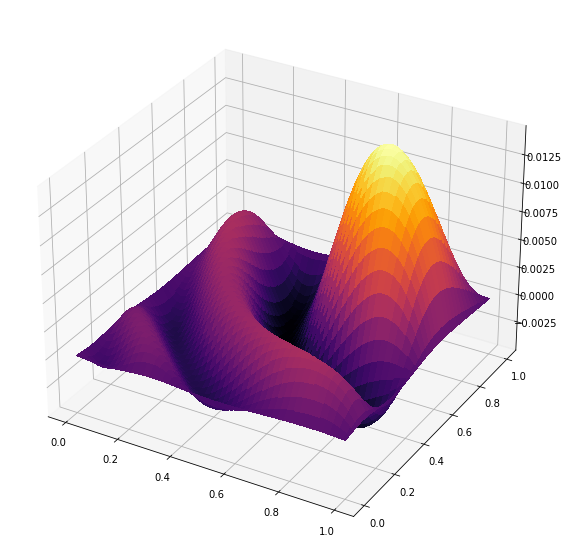

In [15]:
fig = plt.figure(figsize =(15, 10))

ax = fig.gca(projection='3d')
surf = ax.plot_surface(XX, YY, u[1:-1,1:-1],cmap='inferno',
                       linewidth=0, antialiased=False)
plt.show()


## TRANSIENT HEAT EQUATION

Consider the 2D transient heat equation given by;
\begin{align}
\frac{\partial{T}}{\partial{t}} = \alpha \left[\frac{\partial{T}^2}{\partial{x}^2} + \frac{\partial{T}^2}{\partial{y}^2}\right]
\end{align}
$[0, 1] \times  [0, 1] \, \text{with} \, T = 0 \, \text{on the boundary}$ and initial condition;

\begin{align}
T_{x,y}^{0} = \sin(\pi x)\sin(\pi y)
\end{align}
The exact solution is given by;
\begin{align}
T_{x,y}^{t} =\exp(-2*\alpha \pi^2 t)  \sin(\pi x) \sin(\pi y)
\end{align}

In [16]:
initial_cond = lambda x,y: np.sin(np.pi*x)*np.sin(np.pi*y)


In [17]:
max_cycles = 5  #number of multigrid cycles
nL    = 8   #number of grid levels
nx         = 1*2**(nL-1)  #Domain setup
ny         = 1*2**(nL-1)
tol        = 1e-10  
u   =np.zeros([nx+2,ny+2]) #intialize solution
f   =np.zeros([nx+2,ny+2]) #initialize right hand side

In [18]:
alpha = 1e-2

In [19]:
dx=1.0/nx
dy=1.0/ny

#cell centered node
xc=np.linspace(0.5*dx,1-0.5*dx,nx)
yc=np.linspace(0.5*dy,1-0.5*dy,ny)
XX,YY=np.meshgrid(xc,yc,indexing='ij')

In [20]:

f[1:-1,1:-1]= initial_cond(XX,YY)


In [21]:
dt = 0.001
t = np.arange(0,1,dt)
for i in range(len(t)):
    u=np.zeros([nx+2,ny+2])#approximation
    for it in range(1,max_cycles+1):
        vg = Mgrid_transient3(nL,dt,1e-2)
        u,res=vg.vycle(nx,ny,u,f)
        rtol=np.max(np.max(np.abs(res)))
        if(rtol<tol):
            break
    f=np.zeros([nx+2,ny+2])#RHS
    f = u     
 

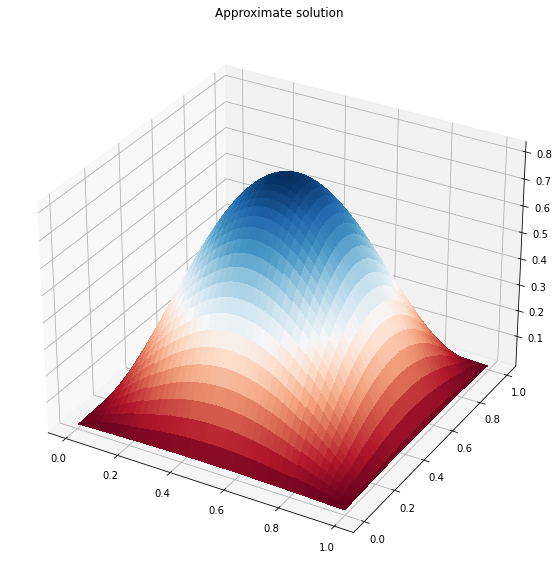

In [22]:
fig = plt.figure(figsize =(15, 10))

ax = fig.gca(projection='3d')
surf = ax.plot_surface(XX, YY, u[1:-1,1:-1],cmap='RdBu',
                       linewidth=0, antialiased=False)

ax.set_title("Approximate solution")
plt.savefig('Approximate_plot.png')
plt.show()

In [23]:
### TRUE SOLUTION

In [24]:
exact  = lambda x,y,t,alpha :np.exp(-alpha*2*np.pi**2*t)*np.sin(np.pi*x)*np.sin(np.pi*y)

In [25]:
exxxact = exact(XX,YY,t[-1],1e-2)

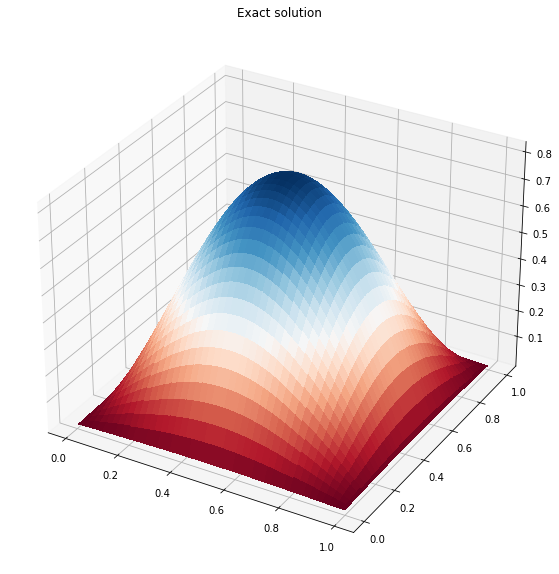

In [26]:
fig = plt.figure(figsize =(15, 10))

ax = fig.gca(projection='3d')
surf = ax.plot_surface(XX, YY, exxxact,cmap='RdBu',
                       linewidth=0, antialiased=False)
ax.set_title("Exact solution")
plt.savefig('Exact_plot.png')
plt.show()

In [27]:
np.max(np.abs(u[1:-1,1:-1]-exxxact))

0.00013790589356077465

In [28]:
err = np.abs(u[1:-1,1:-1] - exxxact)

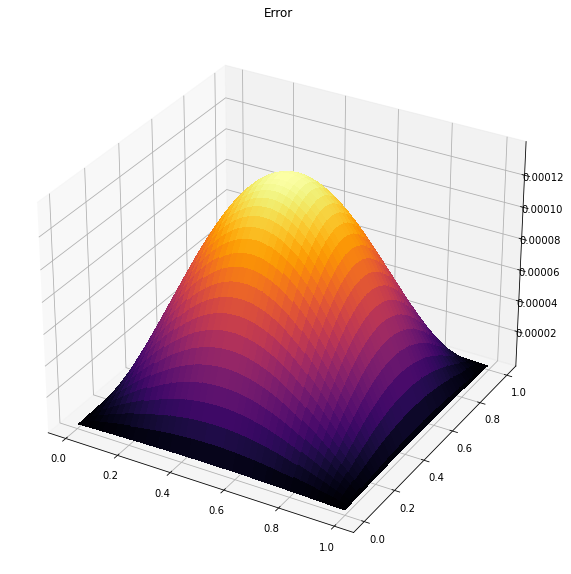

In [29]:
fig = plt.figure(figsize =(15, 10))

ax = fig.gca(projection='3d')
surf = ax.plot_surface(XX, YY, err,cmap='inferno',
                       linewidth=0, antialiased=False)

ax.set_title("Error")
plt.savefig('Error_plot.png')
plt.show()